# Workshop 4 : Model Training and Evaluation

<h1>Sections:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Classification" data-toc-modified-id="Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Classification</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regression</a></span></li><li><span><a href="#Clustering-and-Anomaly-Detection" data-toc-modified-id="Clustering-and-Anomaly-Detection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clustering and Anomaly Detection</a></span></li><li><span><a href="#Time-Series" data-toc-modified-id="Time-Series-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Time Series</a></span></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Selection</a></span><ul class="toc-item"><li><span><a href="#AutoML" data-toc-modified-id="AutoML-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>AutoML</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Cross-Validation</a></span></li></ul></li></ul></div>

<div class="alert alert-block alert-warning">
Before going through model training you need to conduct data preparation, and feature engineering to increase the chances to get good performance.
</div>

In [1]:
import verticapy as vp
from verticapy.learn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# Connect with the database
vp.connect("tutorial_connection")
# Create VerticaPy schema for native verticapy models
vp.create_verticapy_schema()

In general, conduction manual data preparation and features engineering lead to better results.
In this section, we will not focus on data preparation because it's out of our scope (please refer to the previous workshops)

customerID    gender    SeniorCitizen    Partner    Dependents    tenure    PhoneService   \\
1    0002-ORFBO    Female                0       True          True         9            True   \\
2    0003-MKNFE      Male                0      False         False         9            True   \\
3    0004-TLHLJ      Male                0      False         False         4            True   \\
     MultipleLines    InternetService    OnlineSecurity    OnlineBackup    DeviceProtection   \\
1               No                DSL                No             Yes                  No   \\
2              Yes                DSL                No              No                  No   \\
3               No        Fiber optic                No              No                 Yes   \\
     TechSupport    StreamingTV    StreamingMovies          Contract    PaperlessBilling       PaymentMethod   \\
1            Yes            Yes                 No          One year                True        Mailed check   \\
2             No             No                Yes    Month-to-month               False        Mailed check   \\
3             No             No                 No    Month-to-month                True    Electronic check   \\
     MonthlyCharges    TotalCharges    Churn  
1              65.6           593.3    False  
2              59.9           542.4    False  
3              73.9          280.85     True  
Rows: 1-3 | Columns: 21
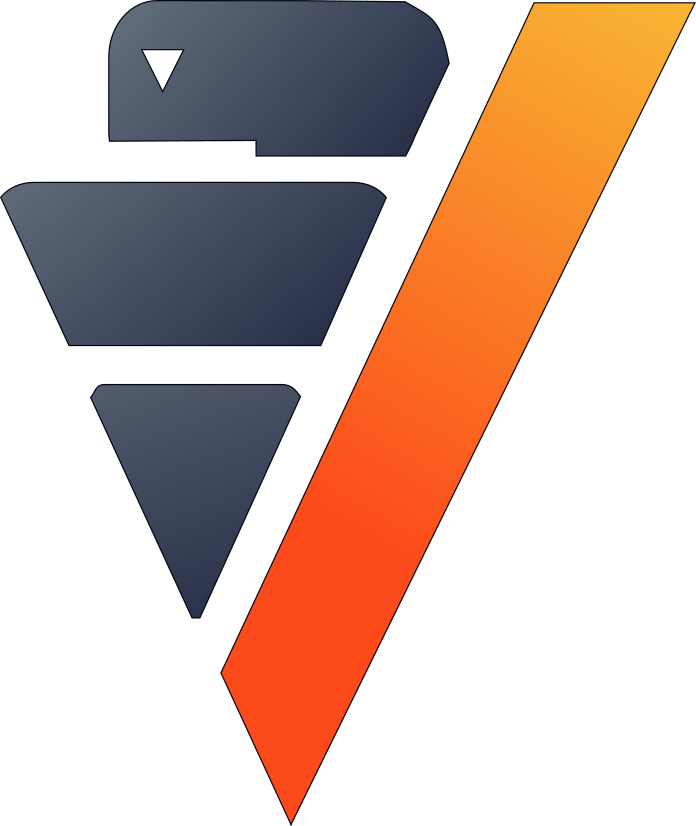

In [2]:
# Read data
churn = vp.vDataFrame("public.churn")
churn.head(3)

Several variables are categorical, and since they all have low cardinalities, we can compute their dummies. We can also convert all booleans to numeric.

SeniorCitizen    Partner    Dependents    tenure    PhoneService    MultipleLines   \\
1                  0          1             1         9               1                0   \\
2                  0          0             0         9               1                1   \\
3                  0          0             0         4               1                0   \\
4                  1          1             0        13               1                0   \\
5                  1          1             0         3               1                0   \\
6                  0          0             1         9               1                0   \\
7                  1          1             0        71               1                0   \\
8                  0          1             0        63               1                1   \\
9                  1          0             0         7               1                0   \\
10                 0          1             1        65               1                1   \\
11                 0          0             0        54               0                0   \\
12                 0          1             1        72               1                1   \\
13                 0          1             0         5               1                0   \\
14                 0          0             0        72               1                1   \\
15                 0          0             0        56               0                0   \\
16                 0          1             1        71               1                1   \\
17                 0          1             1        34               0                0   \\
18                 1          0             0         1               1                1   \\
19                 1          0             0        45               1                0   \\
20                 1          0             0         1               0                0   \\
21                 1          1             0        50               1                1   \\
22                 0          1             0        13               1                1   \\
23                 0          1             1        23               1                1   \\
24                 0          0             0         3               1                0   \\
25                 0          1             1         4               1                0   \\
26                 0          1             1         1               0                0   \\
27                 0          1             1        55               1                0   \\
28                 0          1             1        54               1                0   \\
29                 0          0             0        26               1                0   \\
30                 0          1             1        69               1                0   \\
31                 0          1             1        37               1                0   \\
32                 0          1             0        49               1                0   \\
33                 0          1             0        66               1                1   \\
34                 0          0             0        67               1                0   \\
35                 0          1             1        20               0                0   \\
36                 0          0             1        43               1                1   \\
37                 0          1             0        55               1                1   \\
38                 0          1             0        59               1                1   \\
39                 0          1             1        12               1                0   \\
40                 0          1             1        27               1                1   \\
41                 1          0             0         2               1                0   \\
42                 0          0             0        27    
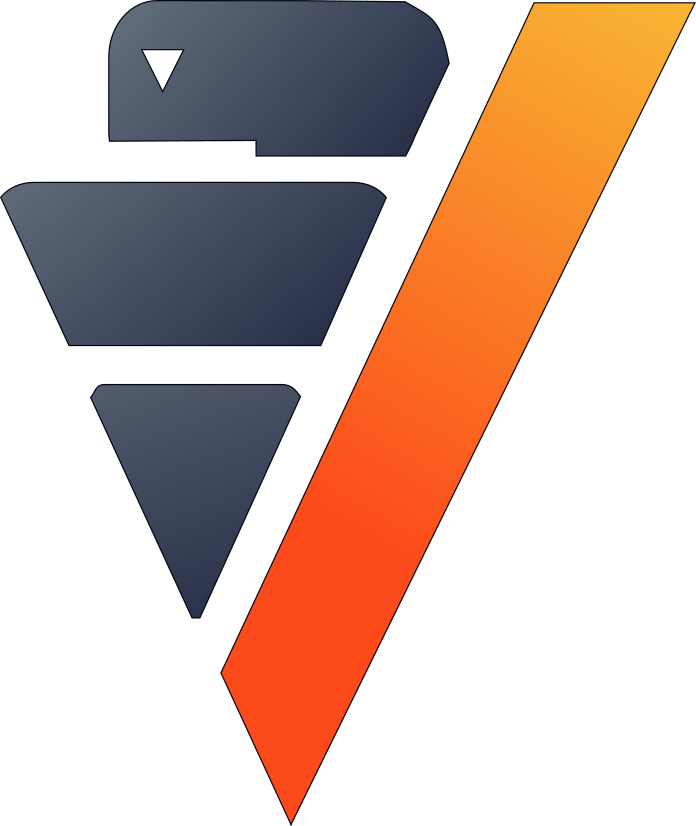

In [3]:
for column in ["DeviceProtection",
               "MultipleLines",
               "PaperlessBilling",
               "Churn",
               "TechSupport",
               "Partner",
               "StreamingTV",
               "OnlineBackup",
               "Dependents",
               "OnlineSecurity",
               "PhoneService",
               "StreamingMovies"]:
    churn[column].decode("Yes", 1, 0)
churn.one_hot_encode().drop(["customerID",
                             "gender",
                             "Contract",
                             "PaymentMethod",
                             "InternetService"])

In [4]:
# Split data to train and test data
train, test = churn.train_test_split(test_size=0.2,
                                     random_state=0)

## Classification 

For more models, please check [here](https://www.vertica.com/python/documentation_last/learn/classification.php)

value  
auc                0.8068001521408384  
prc_auc            0.5683304399881255  
accuracy             0.78995756718529  
log_loss            0.173385096056667  
precision          0.5765472312703583  
recall             0.5145348837209303  
f1_score            0.543778801843318  
mcc                0.4090386752326139  
informedness       0.3930395566181266  
markedness         0.4256890560219393  
csi               0.37341772151898733  
cutoff                            0.5  
Rows: 1-12 | Columns: 2
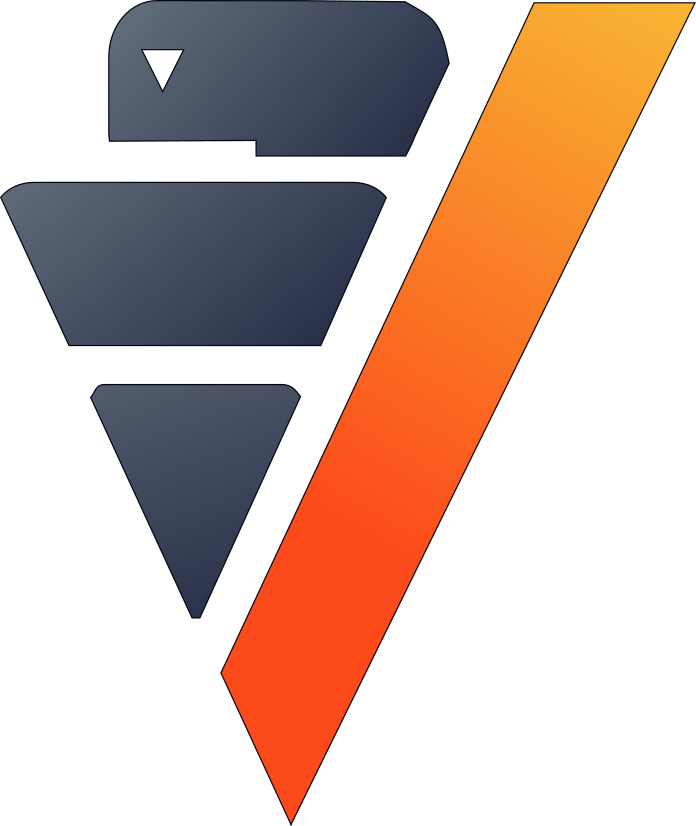

In [5]:
lr_model = LogisticRegression("churn_model",
                              penalty='L2',
                              tol=1e-6,
                              max_iter=1000,
                              solver="BFGS")
lr_model.fit(train,
             churn.get_columns(exclude_columns=["churn"]),
             'churn',
             test)
lr_model.classification_report()

importance    sign  
tenure                                         29.34      -1  
totalcharges                                   19.89       1  
contract_month-to-month                         8.32       1  
internetservice_fiber_optic                     6.68       1  
monthlycharges                                  5.31       1  
phoneservice                                    5.22      -1  
contract_one_year                               3.69       1  
internetservice_dsl                             2.84       1  
onlinesecurity                                  2.79      -1  
techsupport                                      2.6      -1  
paymentmethod_electronic_check                  2.55       1  
paperlessbilling                                2.51       1  
onlinebackup                                    1.64      -1  
dependents                                      1.39      -1  
seniorcitizen                                   1.25       1  
multiplelines                                   0.86       1  
streamingtv                                     0.83       1  
paymentmethod_bank_transfer_(automatic)         0.55       1  
partner                                         0.45       1  
paymentmethod_credit_card_(automatic)           0.42      -1  
streamingmovies                                 0.39       1  
deviceprotection                                 0.3      -1  
gender_female                                   0.17      -1  
Rows: 1-23 | Columns: 3
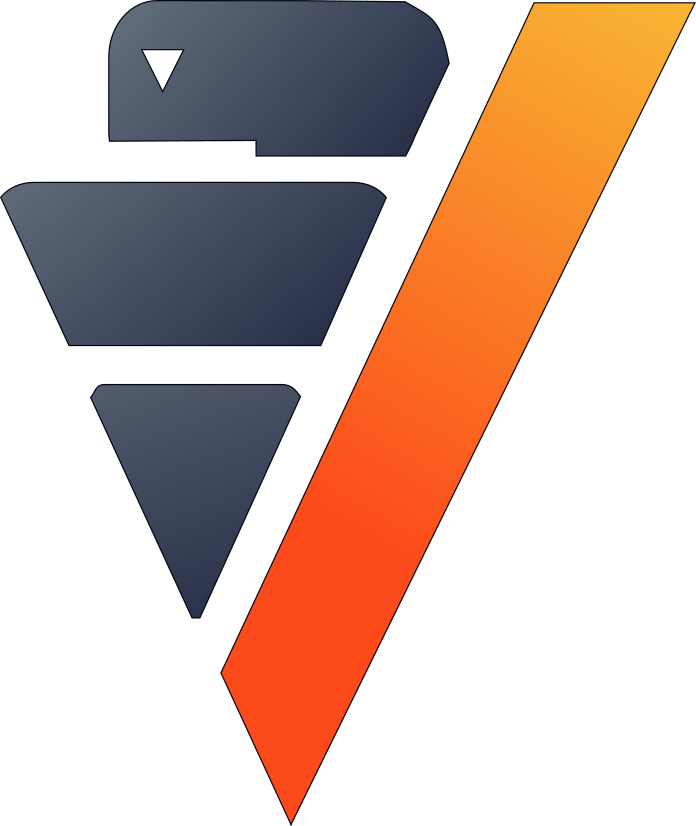

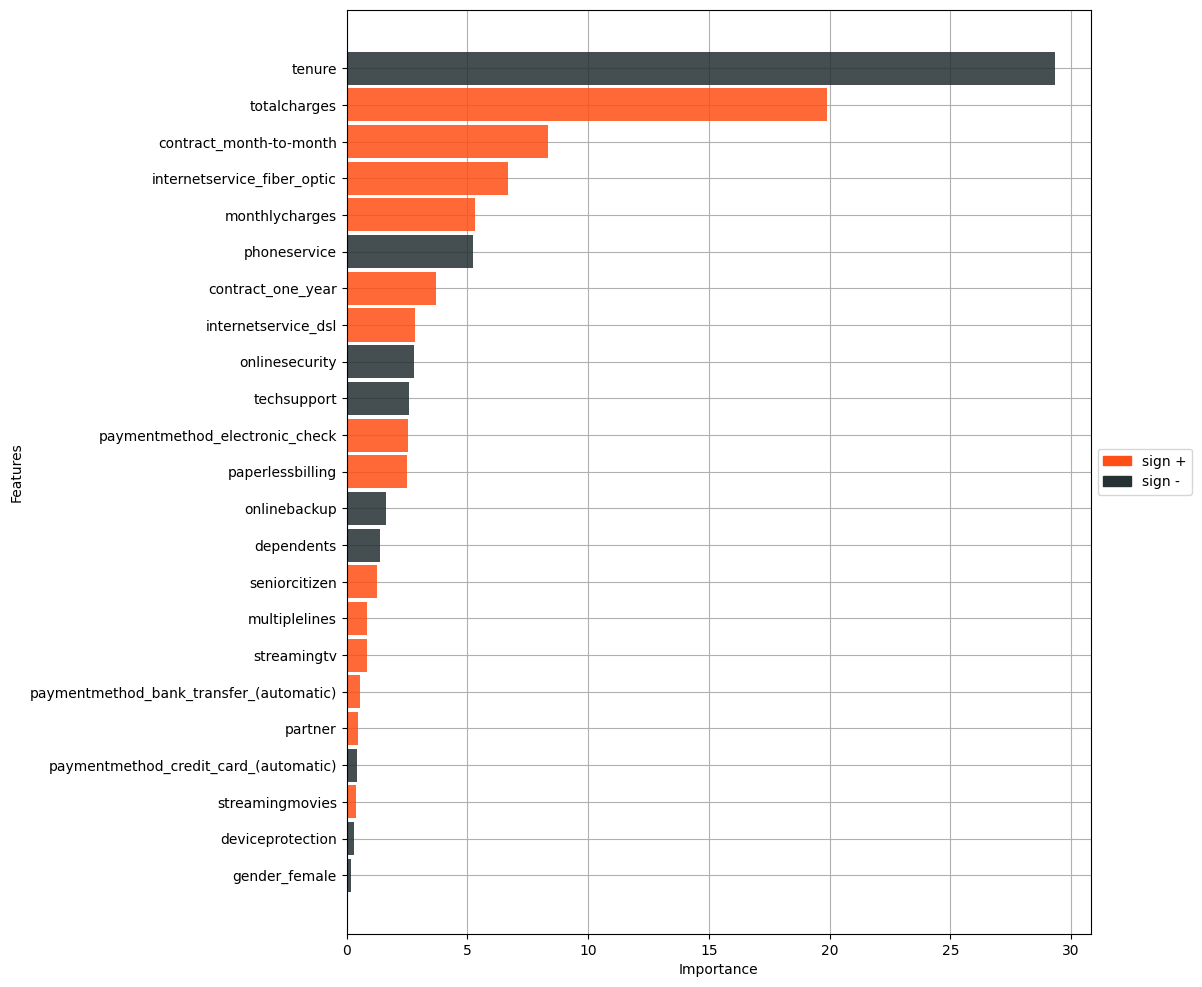

In [6]:
lr_model.features_importance()

## Regression

For more models, please check [here](https://www.vertica.com/python/documentation_last/learn/regression.php)

In [7]:
from verticapy.learn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(name="public.rf_churn",
                                 n_estimators=20,
                                 max_features="auto",
                                 max_leaf_nodes=32,
                                 sample=0.7,
                                 max_depth=3,
                                 min_samples_leaf=5,
                                 min_info_gain=0.0,
                                 nbins=32)
rf_model.fit(train,
             churn.get_columns(exclude_columns=["totalcharges"]),
             'totalcharges',
             test)



call_string
SELECT rf_regressor('public.rf_churn', '"public"."_verticapy_tmp_view_dbadmin_183529_350392238_"', 'totalcharges', '"SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "MonthlyCharges", "Churn", "gender_Female", "InternetService_DSL", "InternetService_Fiber_optic", "Contract_Month-to-month", "Contract_One_year", "PaymentMethod_Bank_transfer_(automatic)", "PaymentMethod_Credit_card_(automatic)", "PaymentMethod_Electronic_check"' USING PARAMETERS exclude_columns='', ntree=20, mtry=8, sampling_size=0.7, max_depth=3, max_breadth=32, min_leaf_size=5, min_info_gain=0, nbins=32);

details
               predictor               |      type      
---------------------------------------+----------------
             seniorcitizen             |      int       
                partner                |      int       
             

value  
explained_variance            0.918420931627101  
max_error                      2288.21782525288  
median_absolute_error          384.280708252025  
mean_absolute_error            494.099442088597  
mean_squared_error             409781.453286693  
root_mean_squared_error       640.1417446837013  
r2                            0.918420304326876  
r2_adj                       0.9170694526346646  
aic                          18309.599441758946  
bic                          18434.818177629255  
Rows: 1-10 | Columns: 2
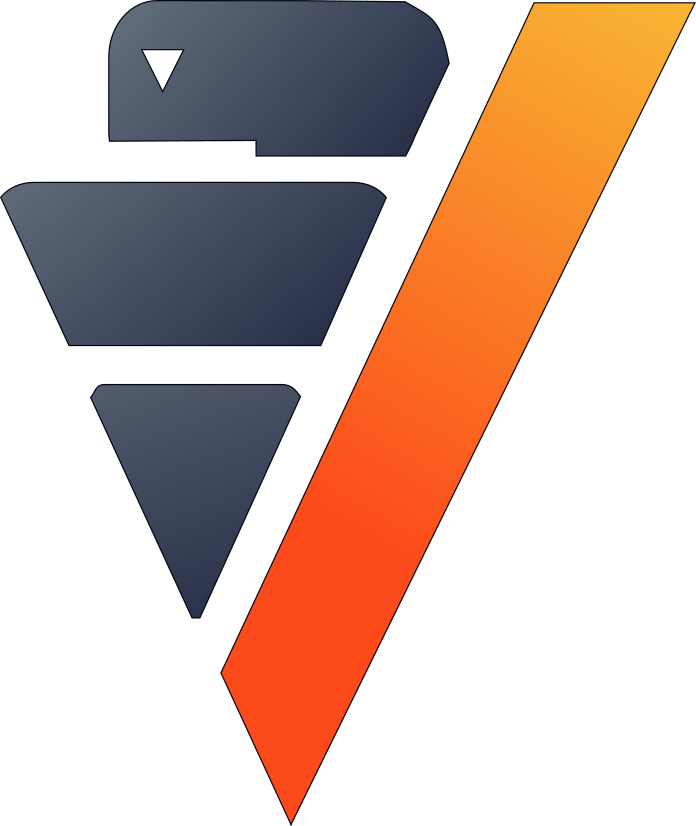

In [8]:
rf_model.report()

## Clustering and Anomaly Detection 

For more models, please check [here](https://www.vertica.com/python/documentation_last/learn/unsupervised.php)

In [9]:
from verticapy.learn.cluster import KMeans
kmeans_model = KMeans(name="public.kmeans_iris",
                      n_cluster=8,
                      init="kmeanspp",
                      max_iter=300,
                      tol=1e-4)
kmeans_model.fit(churn,
                 churn.get_columns(exclude_columns=["churn"]))



centers
seniorcitizen|partner |dependents| tenure |phoneservice|multiplelines|onlinesecurity|onlinebackup|deviceprotection|techsupport|streamingtv|streamingmovies|paperlessbilling|monthlycharges|totalcharges|gender_female|internetservice_dsl|internetservice_fiber_optic|contract_month-to-month|contract_one_year|paymentmethod_bank_transfer_(automatic)|paymentmethod_credit_card_(automatic)|paymentmethod_electronic_check
-------------+--------+----------+--------+------------+-------------+--------------+------------+----------------+-----------+-----------+---------------+----------------+--------------+------------+-------------+-------------------+---------------------------+-----------------------+-----------------+---------------------------------------+-------------------------------------+------------------------------
   0.12127   | 0.27239|  0.23886 | 6.21176|   0.88930  |   0.16766   |    0.09692   |   0.12081  |     0.10243    |  0.09830  |  0.15021  |    0.15204    |     0.52

In [10]:
# prediction
churn_clustered = kmeans_model.predict(churn,
                                       X=churn.get_columns(
                                           exclude_columns=["churn"]),
                                       name="cluster")

SeniorCitizen    Partner    Dependents    tenure    PhoneService    MultipleLines   \\
1                  0          1             1         9               1                0   \\
2                  0          0             0         9               1                1   \\
3                  0          0             0         4               1                0   \\
4                  1          1             0        13               1                0   \\
5                  1          1             0         3               1                0   \\
6                  0          0             1         9               1                0   \\
7                  1          1             0        71               1                0   \\
8                  0          1             0        63               1                1   \\
9                  1          0             0         7               1                0   \\
10                 0          1             1        65               1                1   \\
11                 0          0             0        54               0                0   \\
12                 0          1             1        72               1                1   \\
13                 0          1             0         5               1                0   \\
14                 0          0             0        72               1                1   \\
15                 0          0             0        56               0                0   \\
16                 0          1             1        71               1                1   \\
17                 0          1             1        34               0                0   \\
18                 1          0             0         1               1                1   \\
19                 1          0             0        45               1                0   \\
20                 1          0             0         1               0                0   \\
21                 1          1             0        50               1                1   \\
22                 0          1             0        13               1                1   \\
23                 0          1             1        23               1                1   \\
24                 0          0             0         3               1                0   \\
25                 0          1             1         4               1                0   \\
26                 0          1             1         1               0                0   \\
27                 0          1             1        55               1                0   \\
28                 0          1             1        54               1                0   \\
29                 0          0             0        26               1                0   \\
30                 0          1             1        69               1                0   \\
31                 0          1             1        37               1                0   \\
32                 0          1             0        49               1                0   \\
33                 0          1             0        66               1                1   \\
34                 0          0             0        67               1                0   \\
35                 0          1             1        20               0                0   \\
36                 0          0             1        43               1                1   \\
37                 0          1             0        55               1                1   \\
38                 0          1             0        59               1                1   \\
39                 0          1             1        12               1                0   \\
40                 0          1             1        27               1                1   \\
41                 1          0             0         2               1                0   \\
42                 0          0             0        27    
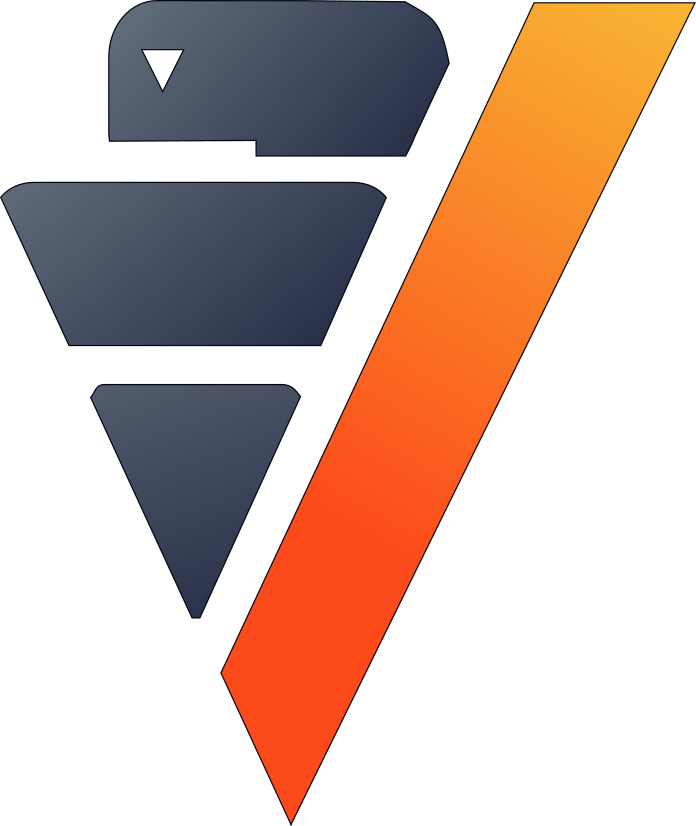

In [11]:
churn_clustered

For Isolation forest you can use `decision_function` to return the anomaly score (range from 0 to 1), then it gave you the flexibility to choose the threshold manually.

SeniorCitizen    Partner    Dependents    tenure    PhoneService    MultipleLines   \\
1                  0          1             1         9               1                0   \\
2                  0          0             0         9               1                1   \\
3                  0          0             0         4               1                0   \\
4                  1          1             0        13               1                0   \\
5                  1          1             0         3               1                0   \\
6                  0          0             1         9               1                0   \\
7                  1          1             0        71               1                0   \\
8                  0          1             0        63               1                1   \\
9                  1          0             0         7               1                0   \\
10                 0          1             1        65               1                1   \\
11                 0          0             0        54               0                0   \\
12                 0          1             1        72               1                1   \\
13                 0          1             0         5               1                0   \\
14                 0          0             0        72               1                1   \\
15                 0          0             0        56               0                0   \\
16                 0          1             1        71               1                1   \\
17                 0          1             1        34               0                0   \\
18                 1          0             0         1               1                1   \\
19                 1          0             0        45               1                0   \\
20                 1          0             0         1               0                0   \\
21                 1          1             0        50               1                1   \\
22                 0          1             0        13               1                1   \\
23                 0          1             1        23               1                1   \\
24                 0          0             0         3               1                0   \\
25                 0          1             1         4               1                0   \\
26                 0          1             1         1               0                0   \\
27                 0          1             1        55               1                0   \\
28                 0          1             1        54               1                0   \\
29                 0          0             0        26               1                0   \\
30                 0          1             1        69               1                0   \\
31                 0          1             1        37               1                0   \\
32                 0          1             0        49               1                0   \\
33                 0          1             0        66               1                1   \\
34                 0          0             0        67               1                0   \\
35                 0          1             1        20               0                0   \\
36                 0          0             1        43               1                1   \\
37                 0          1             0        55               1                1   \\
38                 0          1             0        59               1                1   \\
39                 0          1             1        12               1                0   \\
40                 0          1             1        27               1                1   \\
41                 1          0             0         2               1                0   \\
42                 0          0             0        27    
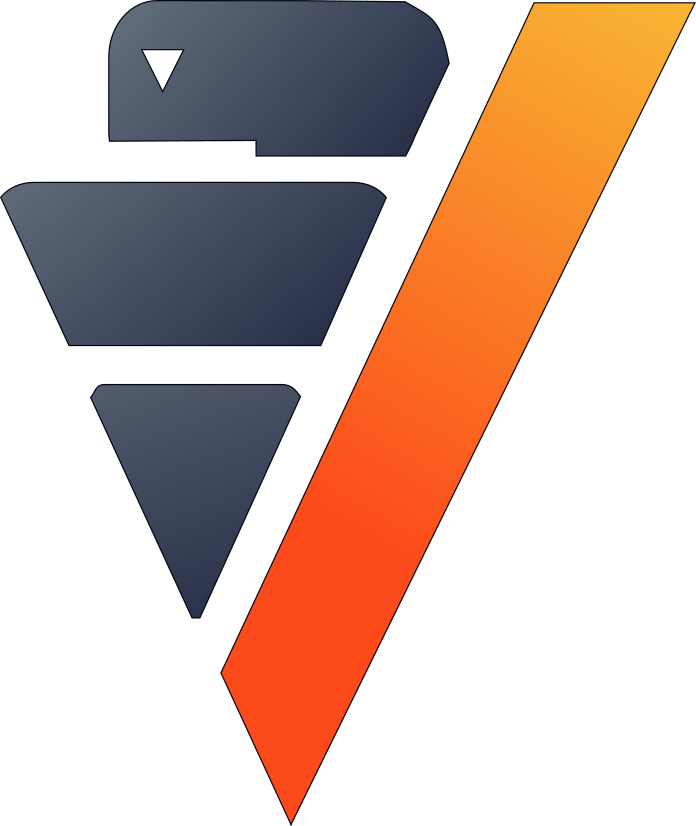

In [12]:
from verticapy.learn.ensemble import IsolationForest

# Initialization of isolation forest
iforest_model = IsolationForest(name="public.iforest_model",
                                n_estimators=20,
                                max_depth=3,
                                nbins=32)
# fit the model
iforest_model.fit(churn,
                  churn.get_columns(exclude_columns=["cluster"]))

# prediction
iforest_model.decision_function(churn,
                                churn.get_columns(exclude_columns=["cluster"]),
                                name="anomaly_score")

## Time Series
Time series models are a type of regression on a dataset with a timestamp label.

date                Gold                 Oil                 Spread                 Vix   \\
1      1986-01-01    345.561363636364    22.9254545454545       1.05142857142857    18.1213636363636   \\
2      1986-02-01            339.0525    15.4547368421053      0.736842105263158    20.6242105263158   \\
3      1986-03-01    346.094736842105             12.6125                  0.564              23.564   \\
4      1986-04-01    340.715909090909    12.8436363636364      0.604090909090909    23.0154545454545   \\
5      1986-05-01             342.325     15.377619047619      0.642380952380952             18.8875   \\
6      1986-06-01    342.797619047619    13.4257142857143      0.614761904761905    18.5980952380952   \\
7      1986-07-01    348.554347826087    11.5845454545455      0.636818181818182    19.6390909090909   \\
8      1986-08-01              376.29    15.0966666666667       0.83952380952381    18.6380952380952   \\
9      1986-09-01    418.152272727273    14.8666666666667       1.10142857142857    22.7052380952381   \\
10     1986-10-01    423.863043478261    14.8968181818182       1.14727272727273    22.5239130434783   \\
11     1986-11-01            396.9825    15.2215789473684      0.973888888888889    18.6315789473684   \\
12     1986-12-01    391.595238095238     16.107619047619      0.840909090909091    19.7586363636364   \\
13     1987-01-01     408.52380952381    18.6514285714286                 0.8585    20.7666666666667   \\
14     1987-02-01             401.045    17.7489473684211      0.852631578947368    23.4463157894737   \\
15     1987-03-01    408.847727272727    18.3028571428571      0.824090909090909    21.8372727272727   \\
16     1987-04-01             439.665    18.6771428571429      0.998571428571429    26.8814285714286   \\
17     1987-05-01              461.65             19.4375                 0.8515             25.4115   \\
18     1987-06-01    449.277272727273    20.0731818181818      0.829090909090909    21.6245454545455   \\
19     1987-07-01    450.330434782609    21.3421739130435       1.00454545454545    17.8009090909091   \\
20     1987-08-01            460.9875    20.3109523809524       1.00761904761905    20.8490476190476   \\
21     1987-09-01    460.120454545455               19.53       1.07809523809524    22.8938095238095   \\
22     1987-10-01    465.763636363636    19.8590909090909       1.12238095238095    58.2195454545455   \\
23     1987-11-01    468.140476190476              18.854       1.16789473684211             49.4365   \\
24     1987-12-01    487.078571428571    17.2745454545455                   1.13    41.7640909090909   \\
25     1988-01-01            477.7575             17.1295       1.03578947368421             38.3365   \\
26     1988-02-01     442.12380952381    16.7957142857143                 1.0315              33.674   \\
27     1988-03-01    443.491304347826    16.1973913043478       1.10304347826087    29.3569565217391   \\
28     1988-04-01    451.557894736842             17.8625                  1.129              27.405   \\
29     1988-05-01              451.32    17.4236363636364       1.09333333333333    25.7166666666667   \\
30     1988-06-01    451.656818181818    16.5277272727273      0.895454545454546    25.2709090909091   \\
31     1988-07-01    437.452380952381             15.4975                  0.777              23.644   \\
32     1988-08-01    431.063636363636    15.5234782608696      0.631739130434783    23.7073913043478   \\
33     1988-09-01    413.438636363636    14.5354545454545      0.513809523809524    19.5242857142857   \\
34     1988-10-01    406.390476190476    13.7704761904762                 0.4415    20.4819047619048   \\
35     1988-11-01    419.965909090909    14.1413636363636                 0.2965    21.6590476190476   \\
36     1988-12-01            419.2475     16.382380952381     0.0171428571428571    17.7542857142857   \\
37     1989-01-01    404.445238095238    18.0242857142857                 -0.084    17.7580
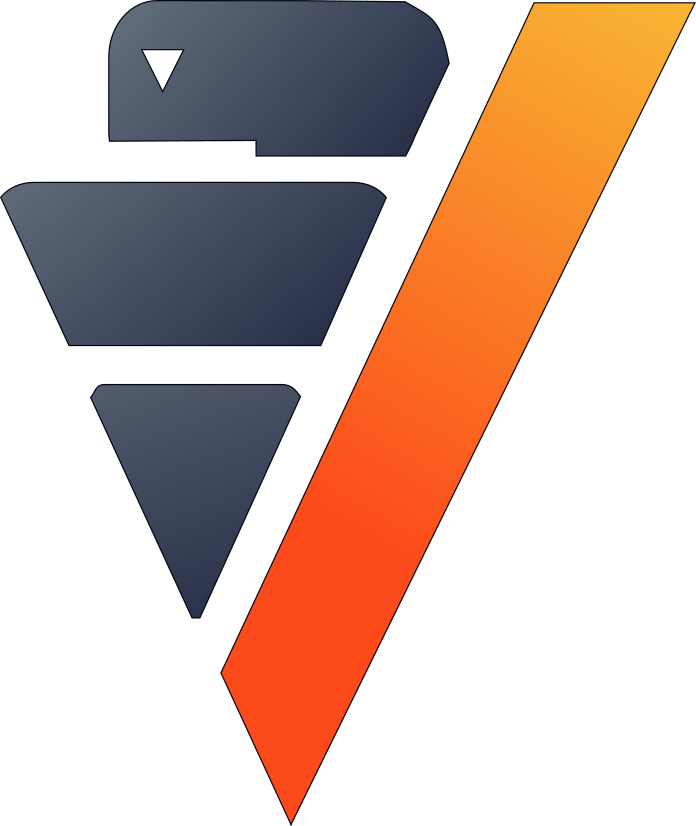

In [13]:
from verticapy.datasets import load_commodities
commodities = load_commodities()
display(commodities)

Let's create a [`VAR`](https://www.vertica.com/python/documentation_last/learn/VAR/) model to predict the change in our variables over time.

<div class="alert alert-block alert-warning">
    VAR and <a href="https://www.vertica.com/python/documentation_last/learn/SARIMAX/index.php" title="read_csv">SARIMAX</a> models implementation uses pure SQL, so it is advisable not to use it on a huge dataset.
</div>

In [14]:
from verticapy.learn.tsa import VAR
var_model = VAR("VAR_commodities", p=15)
var_model.drop()
var_model.fit(input_relation="commodities",
              X=["Gold", "Oil", "Spread", "Vix", "Dol_Eur", "SP500"],
              ts="date")

details

 # "Gold"

      predictor            coefficient               std_err                t_value                 p_value  
1     Intercept       28.5362468915191      23.4576167158535       1.21650239396372       0.224719007474869  
2         ar0_1       1.21249546311209    0.0583003268515877       20.7974042100773    9.38585656197178e-61  
3         ar0_2     -0.265717276383384    0.0911043814875882      -2.91662455794823     0.00379668763754037  
4         ar0_3      0.123604924076076    0.0924434825014417       1.33708640924631        0.18217474351721  
5         ar0_4    -0.0846535235905854    0.0922931959314058     -0.917223883475676        0.35973835612789  
6         ar0_5      0.147588310874085    0.0934758772779836       1.57889195770988        0.11538065396013  
7         ar0_6    -0.0746737711527223    0.0964409915451842     -0.774294933682183       0.439346523264487  
8         ar0_7     0.0300398502170651    0.0949450469490103      0.316391967589398       0.75191794

"Gold"                 "Oil"              "Spread"                 "Vix"             "Dol_Eur"   \\
explained_variance            -2.99075369649758     -2.95351617131735     -2.95000151118535     -2.42784247622005     -2.92957533669835   \\
max_error                      3840.31462070037      266.088676452611      5.84729874087839      131.091119943061      2.27388220306767   \\
median_absolute_error          802.159981554754      67.6175692024529      2.21128777148926      39.4665387048983      1.59450253575079   \\
mean_absolute_error            1409.89329069005      90.2459279629996      2.38551707270557      43.1426003196181      1.61750898624812   \\
mean_squared_error              2884679.9957216      11443.5735898725      8.55593673934625      2123.90553226451      2.65971307152233   \\
root_mean_squared_error       1698.434572105031    106.97463993803625     2.925053288291728     46.08584958818173     1.630862677089132   \\
r2                              0.9969178988297     0.984505390437316      0.98333383705978     0.809280825408277     0.976525112259812   \\
r2_adj                       0.9960230952641291    0.9800069554029884    0.9784952736255225    0.7539107424622928    0.9697098222707251   \\
aic                           6201.032439495149      3983.60632301484     1096.984486652658    3308.2534761855104     628.4532201651808   \\
bic                           6510.295227114675     4292.869110634366    1406.2472742721839     3617.516263805036     937.7160077847064   \\
                                        "SP500"  
explained_variance            -2.98564084457666  
max_error                      6746.24885913539  
median_absolute_error          2173.50932929945  
mean_absolute_error            2330.38823686522  
mean_squared_error             7627018.16755038  
root_mean_squared_error       2761.705662729173  
r2                            0.995213614862105  
r2_adj                       0.9938240191769097  
aic                           6590.917919047844  
bic                            6900.18070666737  
Rows: 1-10 | Columns: 7
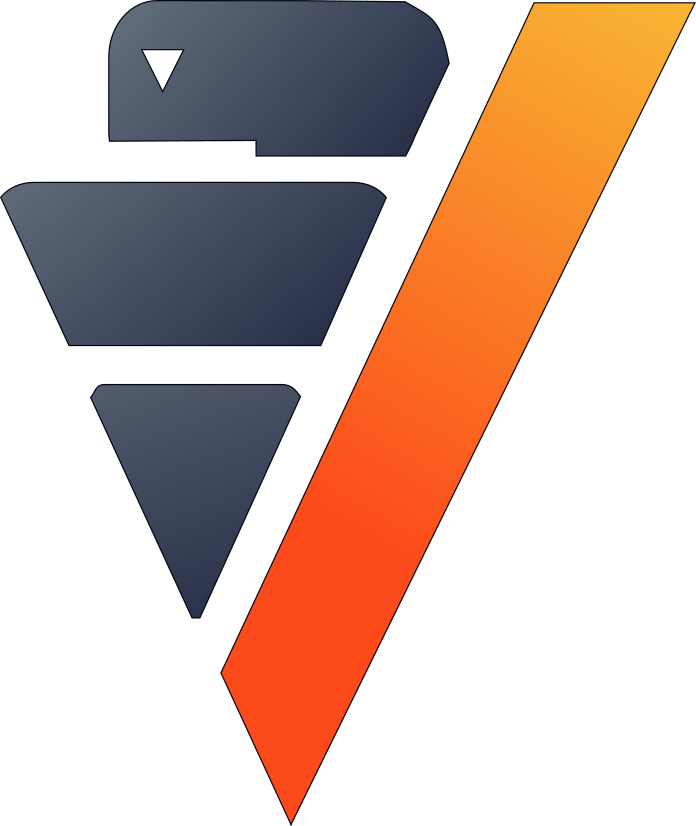

In [15]:
# model report 
var_model.report()

In [16]:
# prediction
prediction = var_model.predict(commodities,
                               nlead=5)

Let's examine our prediction with a boxplot.

<AxesSubplot:>

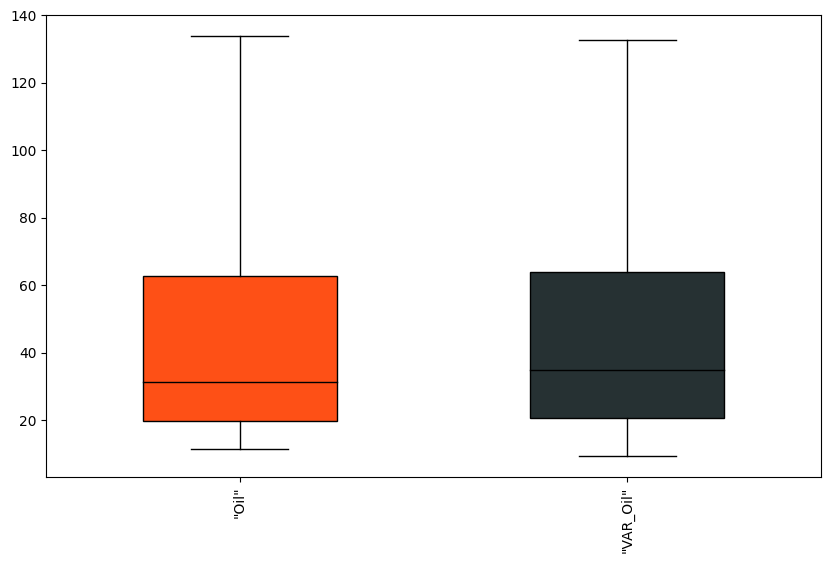

In [17]:
prediction.boxplot(["Oil", "VAR_Oil"])

Let's visualize our model with a graph.

In [18]:
commodities['date'].max()

datetime.date(2020, 8, 1)

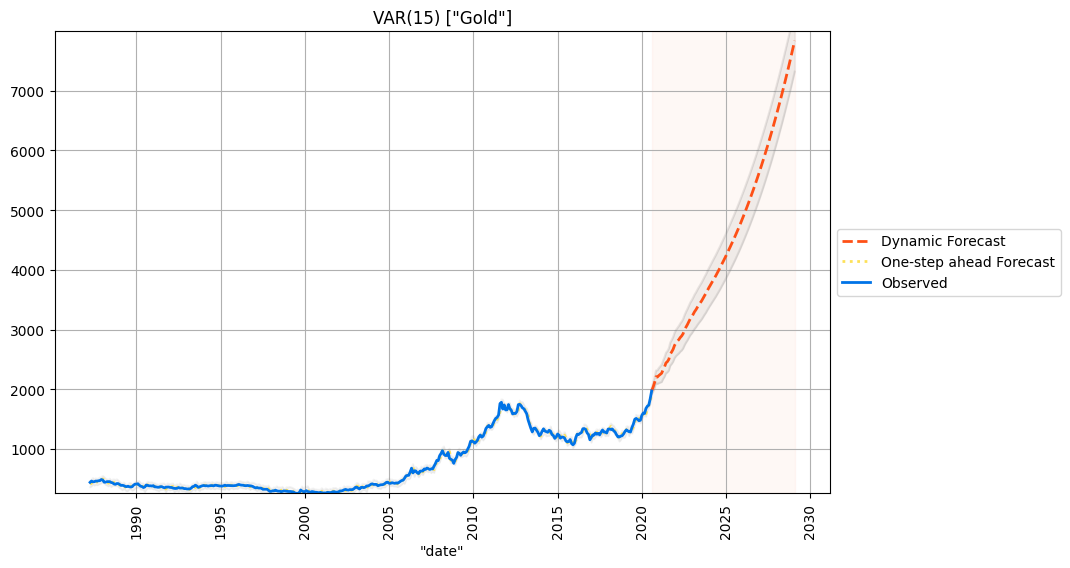

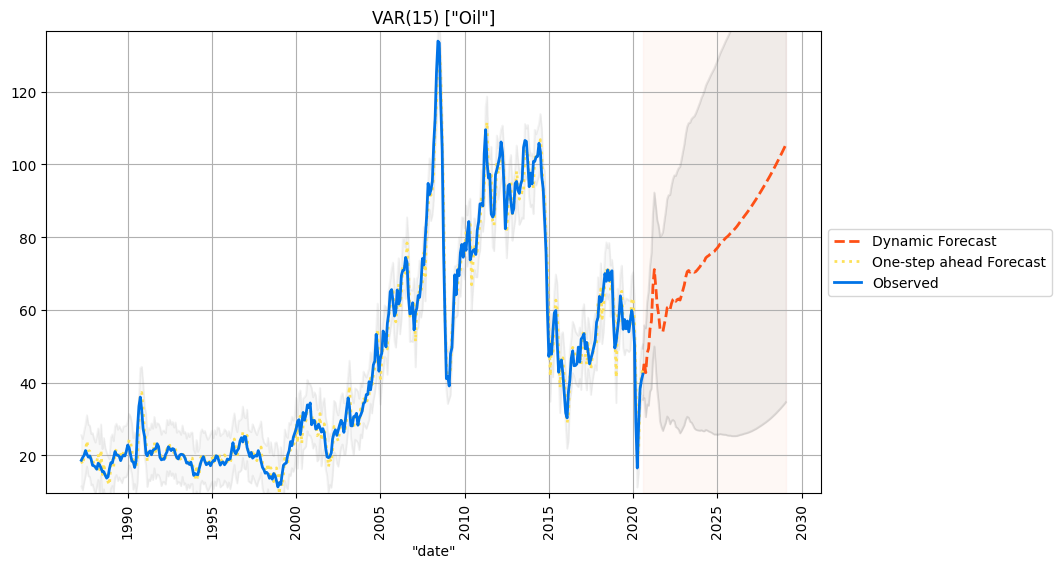

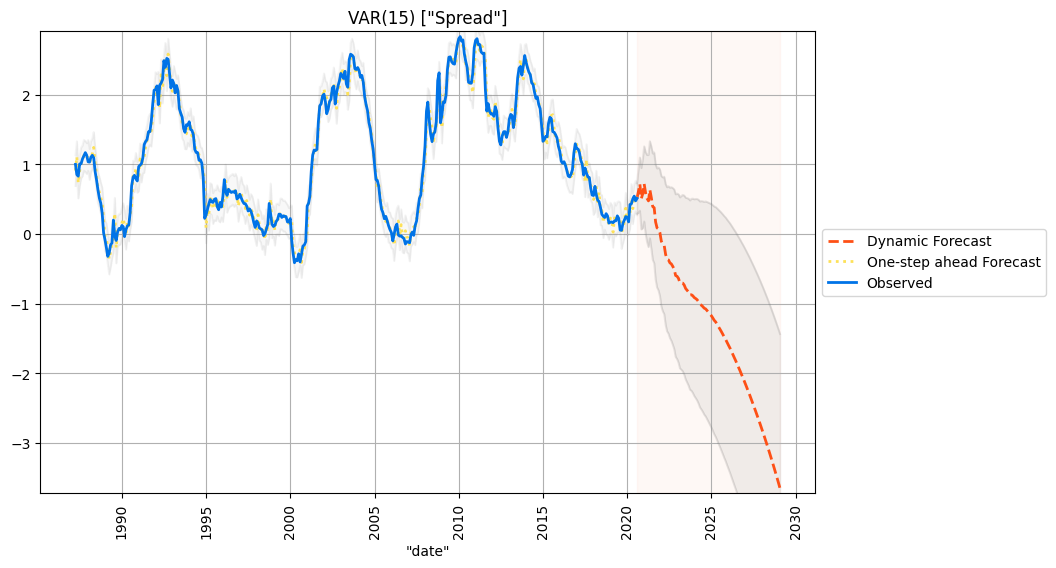

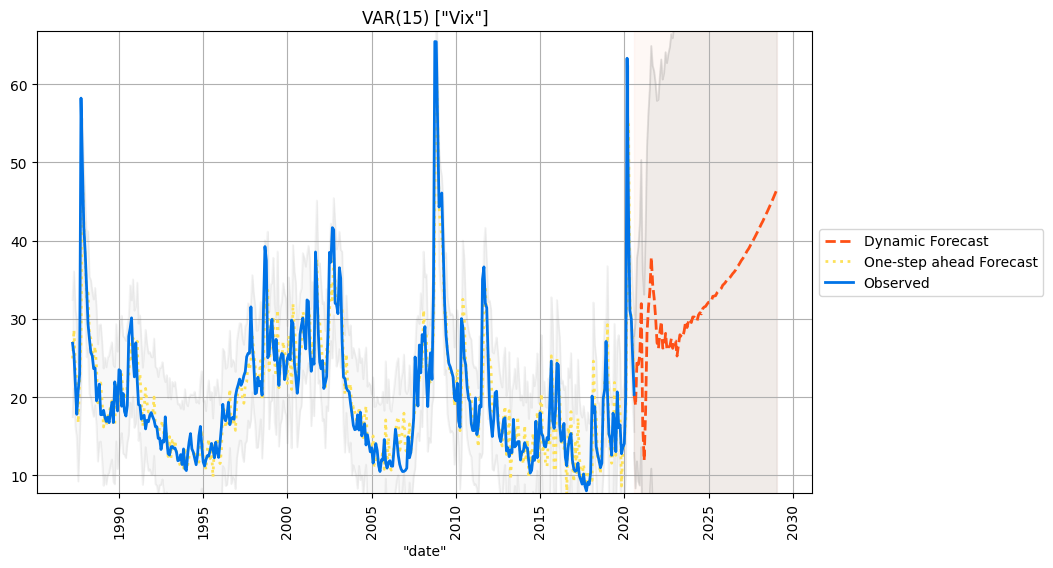

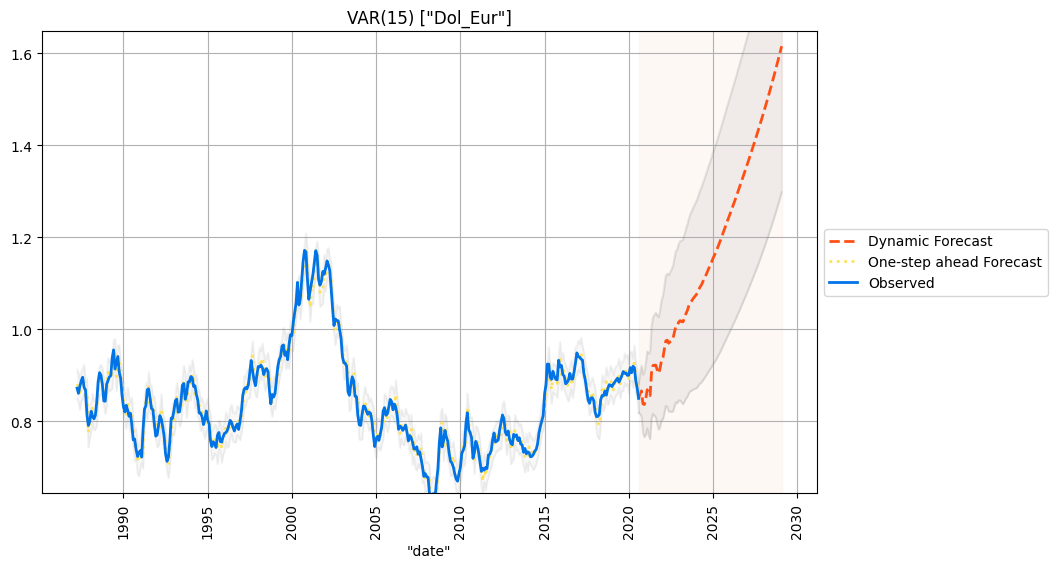

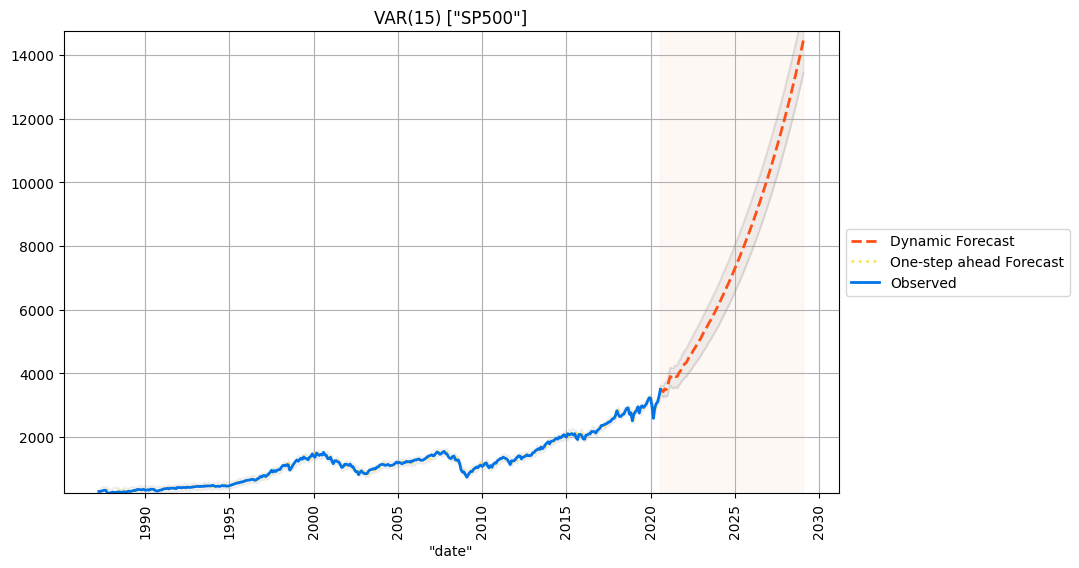

In [19]:
for elem in ['Gold',
             'Oil',
             'Spread',
             'Vix',
             'Dol_Eur',
             'SP500']:
    var_model.plot(X_idx=elem,
                   dynamic=True,
                   nlead=100)

For more scores and metrics, check this [link](https://www.vertica.com/python/documentation_last/vdataframe/main-methods/score/index.php)

## Model Selection

There are tools to help to choose the best model for the given task in terms of performance and fitting the data.

### AutoML
VerticaPy provides [`AutoML`](https://www.vertica.com/python/documentation_last/delphi/automl/) a powerful tool to have reasonable idea which model has more probability to be the good choice for your task.


<div class="alert alert-block alert-info">
    <b>Important:</b> <b>AutoML</b> conduct basic data preparation on the variables as encoding and it choose the type of machine learning suitable for the case, In addition it perform search grid on the hyper-parameters of the model to the choose the best combination</div>
    
Let's try this tool on titanic dataset.

Starting AutoML



  0%|          | 0/2 [00:00<?, ?it/s]


Testing Model - LogisticRegression



  0%|          | 0/4 [00:00<?, ?it/s]

Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'none', 'solver': 'bfgs'}; Test_score: 0.04686178509181593; Train_score: 0.0335172149412594; Time: 34.008386770884194;
Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'l1', 'solver': 'cgd', 'C': 1.0}; Test_score: 0.301029995663981; Train_score: 0.301029995663981; Time: 1.1176848411560059;
Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'l2', 'solver': 'bfgs', 'C': 1.0}; Test_score: 0.0382655207186531; Train_score: 0.03824083512228177; Time: 30.096459070841473;
Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'enet', 'solver': 'cgd', 'C': 1.0, 'l1_ratio': 0.5}; Test_score: 0.301029995663981; Train_score: 0.301029995663981; Time: 0.9609401226043701;
Grid Search Selected Model
LogisticRegression; Parameters: {'solver': 'bfgs', 'penalty': 'l2', 'max_iter': 100, 'C': 1.0, 'tol': 1e-06}; Test_score: 0.0382655207

  0%|          | 0/3 [00:00<?, ?it/s]

Model: NaiveBayes; Parameters: {'alpha': 0.01}; Test_score: 0.14284162258166874; Train_score: 0.06883429228203464; Time: 0.735516627629598;
Model: NaiveBayes; Parameters: {'alpha': 1.0}; Test_score: 0.30989563564523376; Train_score: 0.1380605545536477; Time: 0.6355750560760498;
Model: NaiveBayes; Parameters: {'alpha': 10.0}; Test_score: 0.10896648266168467; Train_score: 0.09305225396128457; Time: 0.5757566293080648;
Grid Search Selected Model
NaiveBayes; Parameters: {'alpha': 10.0, 'nbtype': 'auto'}; Test_score: 0.10896648266168467; Train_score: 0.09305225396128457; Time: 0.5757566293080648;
Final Model

LogisticRegression; Best_Parameters: {'solver': 'bfgs', 'penalty': 'l2', 'max_iter': 100, 'C': 1.0, 'tol': 1e-06}; Best_Test_score: 0.0382655207186531; Train_score: 0.03824083512228177; Time: 30.096459070841473;


Starting Stepwise


  0%|          | 0/16 [00:00<?, ?it/s]

[Model 0] aic: -4757.4306248569255; Variables: ['"age"', '"boat_8"', '"boat_5"', '"boat_3"', '"boat_14"', '"boat_10"', '"boat_C"', '"boat_4"', '"boat_15"', '"boat_13"', '"fare"', '"pclass"', '"boat_Others"', '"sex_male"', '"sex_female"', '"boat_NULL"']
[Model 1] aic: -4758.794692714417; (-) Variable: "age"
[Model 2] aic: -4760.930190828803; (-) Variable: "boat_8"
[Model 3] aic: -4762.283341702114; (-) Variable: "boat_5"
[Model 4] aic: -4764.118918304077; (-) Variable: "boat_3"
[Model 5] aic: -4765.80453613352; (-) Variable: "boat_14"
[Model 6] aic: -4766.307399945768; (-) Variable: "boat_10"
[Model 7] aic: -4767.084826453643; (-) Variable: "boat_C"
[Model 8] aic: -4769.13338694494; (-) Variable: "boat_4"
[Model 9] aic: -4767.916545392255; (-) Variable: "boat_13"
[Model 10] aic: -4767.537280344475; (-) Variable: "boat_Others"
[Model 11] aic: -4767.081112559485; (-) Variable: "sex_male"
Selected Model

[Model 11] aic: -4767.081112559485; Variables: ['"boat_15"', '"fare"', '"pclass"', '"s

model_type                                parameters              avg_score        avg_train_score   \\
1    LogisticRegression  {'solver': 'bfgs', 'penalty': 'l2', '...     0.0382655207186531    0.03824083512228177   \\
2    LogisticRegression  {'solver': 'bfgs', 'penalty': 'none',...    0.04686178509181593     0.0335172149412594   \\
3            NaiveBayes         {'alpha': 10.0, 'nbtype': 'auto'}    0.10896648266168467    0.09305225396128457   \\
4            NaiveBayes         {'alpha': 0.01, 'nbtype': 'auto'}    0.14284162258166874    0.06883429228203464   \\
5    LogisticRegression  {'solver': 'cgd', 'penalty': 'l1', 'm...      0.301029995663981      0.301029995663981   \\
6    LogisticRegression  {'solver': 'cgd', 'penalty': 'enet', ...      0.301029995663981      0.301029995663981   \\
7            NaiveBayes          {'alpha': 1.0, 'nbtype': 'auto'}    0.30989563564523376     0.1380605545536477   \\
               avg_time                 score_std          score_train_std                               model_class  
1    30.096459070841473    0.00021521527628746536    0.0001676309647339366  <class 'verticapy.learn.linear_model....  
2    34.008386770884194      0.009977816999884271     0.004796792936319689  <class 'verticapy.learn.linear_model....  
3    0.5757566293080648       0.02211724227222241     0.008856315974327482  <class 'verticapy.learn.naive_bayes.N...  
4     0.735516627629598       0.15219351395819888     0.004450204796317479  <class 'verticapy.learn.naive_bayes.N...  
5    1.1176848411560059                       0.0                      0.0  <class 'verticapy.learn.linear_model....  
6    0.9609401226043701                       0.0                      0.0  <class 'verticapy.learn.linear_model....  
7    0.6355750560760498        0.3798939151012431      0.06841144400180961  <class 'verticapy.learn.naive_bayes.N...  
Rows: 1-7 | Columns: 8
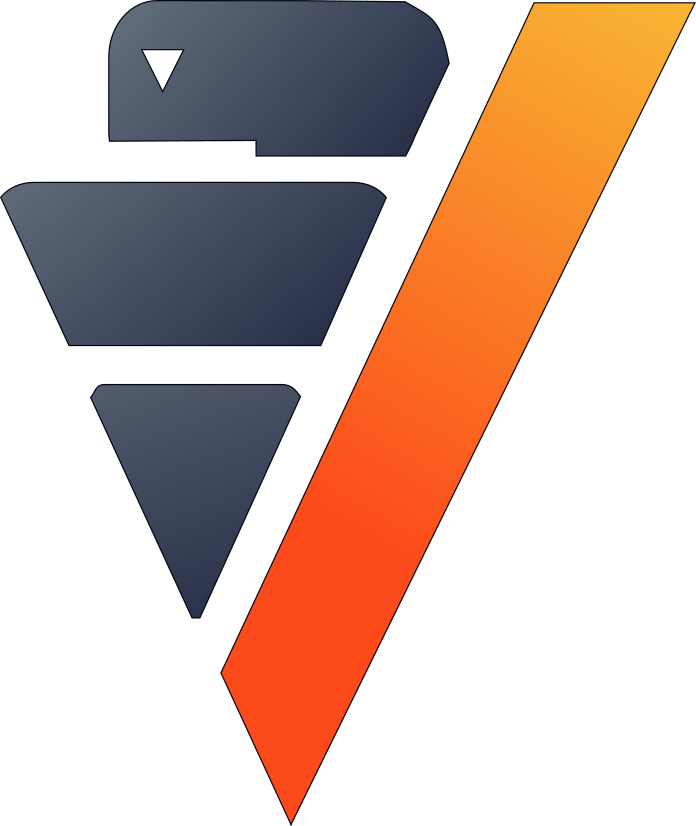

In [20]:
from verticapy.learn.delphi import AutoML

model = AutoML("titanic_autoML")
model.fit("public.titanic",
          X=["boat", "age", "fare", "pclass", "sex"],
          y="survived")

<AxesSubplot:xlabel='n_features', ylabel='aic'>

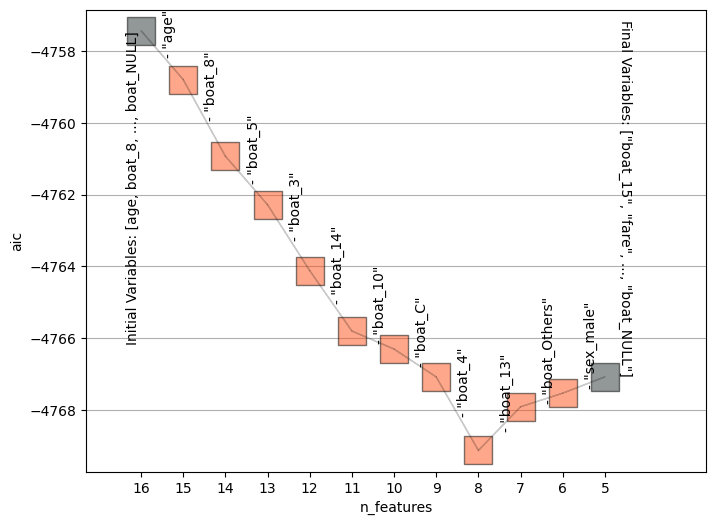

In [21]:
model.plot("stepwise")

<AxesSubplot:xlabel='time', ylabel='score'>

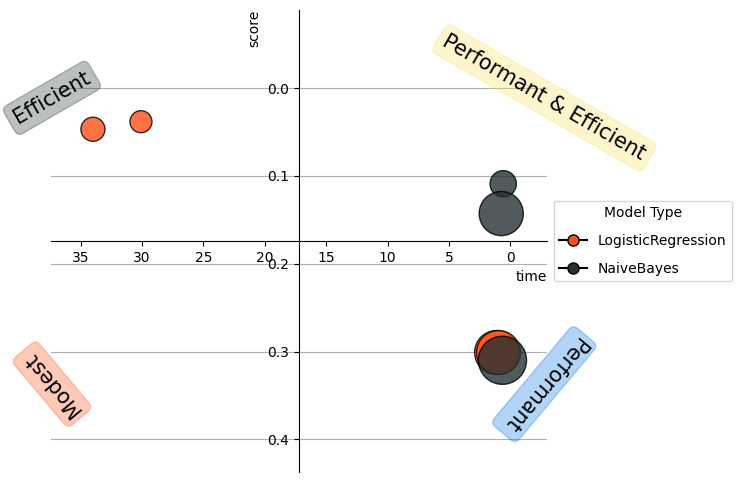

In [22]:
model.plot()

### Grid Search

  0%|          | 0/18 [00:00<?, ?it/s]

Model: LogisticRegression; Parameters: {'tol': 0.01, 'max_iter': 3, 'solver': 'Newton'}; Test_score: 0.840234085968251; Train_score: 0.8535184017475503; Time: 2.3111916383107505;
Model: LogisticRegression; Parameters: {'tol': 0.01, 'max_iter': 3, 'solver': 'BFGS'}; Test_score: 0.6387020857171983; Train_score: 0.6529025226899623; Time: 3.44527268409729;
Model: LogisticRegression; Parameters: {'tol': 0.01, 'max_iter': 10, 'solver': 'Newton'}; Test_score: 0.8487975895722552; Train_score: 0.8498716430303269; Time: 2.1267820994059243;
Model: LogisticRegression; Parameters: {'tol': 0.01, 'max_iter': 10, 'solver': 'BFGS'}; Test_score: 0.6031748344958076; Train_score: 0.6028481639884656; Time: 6.394800424575806;
Model: LogisticRegression; Parameters: {'tol': 0.01, 'max_iter': 100, 'solver': 'Newton'}; Test_score: 0.8472252833390169; Train_score: 0.8511473233580225; Time: 3.303825934727987;
Model: LogisticRegression; Parameters: {'tol': 0.01, 'max_iter': 100, 'solver': 'BFGS'}; Test_score: 0.76

parameters             avg_score       avg_train_score              avg_time   \\
1   {'solver': 'Newton', 'penalty': 'l2',...    0.8536505943006284    0.8480909177149896    2.3038273652394614   \\
2   {'solver': 'BFGS', 'penalty': 'l2', '...    0.8532684642297643    0.8480798715026817     28.15137831370036   \\
3   {'solver': 'Newton', 'penalty': 'l2',...    0.8527988839608152    0.8478432085896468     1.867336352666219   \\
4   {'solver': 'Newton', 'penalty': 'l2',...    0.8494344828587812    0.8498586364314324    2.5453550815582275   \\
5   {'solver': 'Newton', 'penalty': 'l2',...    0.8487975895722552    0.8498716430303269    2.1267820994059243   \\
6   {'solver': 'Newton', 'penalty': 'l2',...    0.8472252833390169    0.8511473233580225     3.303825934727987   \\
7   {'solver': 'BFGS', 'penalty': 'l2', '...    0.8467767184965649    0.8509913272904439    31.250617265701294   \\
8   {'solver': 'Newton', 'penalty': 'l2',...    0.8461983702423483    0.8516529891259144    2.5658950010935464   \\
9   {'solver': 'Newton', 'penalty': 'l2',...    0.8458873630053904    0.8515385454895644     2.226308584213257   \\
10  {'solver': 'Newton', 'penalty': 'l2',...     0.840234085968251    0.8535184017475503    2.3111916383107505   \\
11  {'solver': 'Newton', 'penalty': 'l2',...    0.8395071168092091    0.8535550950428796    2.1396865844726562   \\
12  {'solver': 'BFGS', 'penalty': 'l2', '...    0.7611924148412685    0.7593329806058536    16.914958477020264   \\
13  {'solver': 'BFGS', 'penalty': 'l2', '...    0.6571036864136246    0.6485563962416816    3.3606558640797934   \\
14  {'solver': 'BFGS', 'penalty': 'l2', '...    0.6501576051425988    0.6524062180618322     3.396970192591349   \\
15  {'solver': 'BFGS', 'penalty': 'l2', '...    0.6387020857171983    0.6529025226899623      3.44527268409729   \\
16  {'solver': 'BFGS', 'penalty': 'l2', '...    0.6281805010203927    0.6436097989752562      7.48802916208903   \\
17  {'solver': 'BFGS', 'penalty': 'l2', '...    0.6208662572681269    0.6175387337529945     7.753602425257365   \\
18  {'solver': 'BFGS', 'penalty': 'l2', '...    0.6031748344958076    0.6028481639884656     6.394800424575806   \\
                  score_std          score_train_std  
1      0.005098669712526401     0.002561085732348696  
2      0.007601575148984497     0.003997756557384447  
3      0.005198330804504683     0.002219939513453894  
4      0.003261257025846885    0.0018793787918469165  
5      0.009490574196494005     0.004952219197831921  
6      0.007367409635524947     0.003813481683758992  
7     0.0032426416168940047    0.0018304737563668932  
8      0.004204267720744891    0.0016350739914057064  
9      0.006918029918179807    0.0026148178265678113  
10     0.007801519754538959    0.0037252087178568133  
11     0.006760279208511816     0.002514622043241558  
12      0.08581113822854054      0.08221570247856429  
13     0.012275401592151562    0.0032420463840105397  
14     0.005908605042832795    0.0019918272661536714  
15     0.003395316673399151    0.0024143332225841515  
16      0.03288700256999754      0.04415818117523032  
17       0.0687557074110877      0.08196841530113712  
18      0.04504130257438271     0.040549130544828886  
Rows: 1-18 | Columns: 6
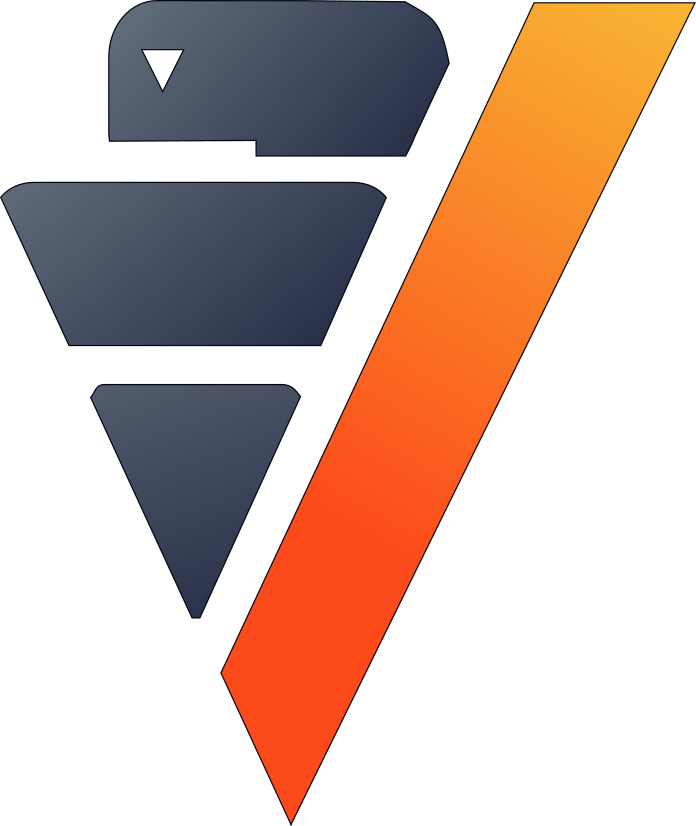

In [23]:
from verticapy.learn.model_selection import grid_search_cv


grid_search_cv(lr_model,
               {"tol": [1e-2, 1e-4, 1e-6],
                "max_iter": [3, 10, 100],
                "solver": ["Newton", "BFGS"]},
               input_relation=churn,
               X=churn.get_columns(exclude_columns=["churn"]),
               y='churn',
               cv=3,
               metric="auc",
               print_info=True)

### Cross-Validation

Let's try [`cross_validate`](https://www.vertica.com/python/documentation_last/learn/cross_validate/index.php). 

More techniques for model selection are provided [here](https://www.vertica.com/python/documentation_last/learn/model-selection.php).

In [ ]:
from verticapy.learn.model_selection import cross_validate
res_test, res_train = cross_validate(
    lr_model,
    input_relation=churn,
    X=churn.get_columns(exclude_columns=["churn"]),
    y='churn',
    cv=3,
    metric="auc",
    training_score=True)

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# Training results
res_train

In [ ]:
# Test results
res_test